## Created by Mukesh Kumar
### This code is part of the LangGraph tutorials, specifically for a Batsman Performance workflow.

In [35]:
from langgraph.graph import StateGraph, START, END
from typing import Any, Dict, List, TypedDict


In [ ]:
class BatsmanPerformanceflowState(TypedDict):
    runs: int
    sixs: int
    fours: int
    balls: int

    strike_rate: float
    balls_per_boundary_percentage: float
    balls_boundary_percent: float

    report: str

In [ ]:
def CalculateStrikeRate(state: BatsmanPerformanceflowState) -> BatsmanPerformanceflowState:
    if state['balls'] == 0:
        raise ValueError("Balls cannot be zero for strike rate calculation.")
    
    strike_rate = (state['runs'] / state['balls']) * 100
    return {
        'strike_rate': strike_rate
    }

def CalculateBallsPerBoundary(state: BatsmanPerformanceflowState) -> BatsmanPerformanceflowState:
    if state['balls'] == 0:
        raise ValueError("Balls cannot be zero for boundary calculation.")
    if state['fours'] + state['sixs'] == 0:
        raise ValueError("Fours and sixes cannot both be zero for boundary calculation.")
    
    total_boundaries = state['fours'] + state['sixs']
    balls_per_boundary_percentage = (state['balls'] / total_boundaries)
    return {
        'balls_per_boundary_percentage' : balls_per_boundary_percentage
    }

def CalculateBoundaryPercent(state: BatsmanPerformanceflowState) -> BatsmanPerformanceflowState:
    if state['balls'] == 0:
        raise ValueError("Balls cannot be zero for boundary percentage calculation.")
    
    total_boundaries_runs = (state['fours'] * 4) + (state['sixs'] * 6)
    if total_boundaries_runs == 0:
        raise ValueError("Fours and sixes cannot both be zero for boundary percentage calculation.")
    
    balls_boundary_percent = (total_boundaries_runs / state['runs']) * 100
    return {
        'balls_boundary_percent': balls_boundary_percent
    }

def GeneratePerformanceReport(state: BatsmanPerformanceflowState) -> str:
    report = (
        f"Batsman Performance Report:\n"
        # f"Runs Scored: {state['runs']}\n"
        # f"Fours: {state['fours']}\n"
        # f"Sixes: {state['sixs']}\n"
        # f"Balls Faced: {state['balls']}\n"
        f"Strike Rate: {state['strike_rate']:.2f}\n"
        f"Balls per Boundary Percentage: {state['balls_per_boundary_percentage']:.2f}\n"
        f"Boundary Percentage: {state['balls_boundary_percent']:.2f}%\n"
    )
    state['report'] = report
    return state

In [ ]:
# Define the state graph for the BMI calculator workflow
BatsmanPerformanceflowGraph = StateGraph(BatsmanPerformanceflowState)

# Add nodes to the graph 
BatsmanPerformanceflowGraph.add_node('Calculate_Strike_Rate',CalculateStrikeRate)
BatsmanPerformanceflowGraph.add_node('Calculate_Balls_Per_Boundary', CalculateBallsPerBoundary)
BatsmanPerformanceflowGraph.add_node('Calculate_Balls_Boundary_Percent', CalculateBoundaryPercent)
BatsmanPerformanceflowGraph.add_node('Report', GeneratePerformanceReport)  # START node

# Add edges to the graph
BatsmanPerformanceflowGraph.add_edge(START, 'Calculate_Strike_Rate')
BatsmanPerformanceflowGraph.add_edge(START, 'Calculate_Balls_Per_Boundary')
BatsmanPerformanceflowGraph.add_edge(START, 'Calculate_Balls_Boundary_Percent')

BatsmanPerformanceflowGraph.add_edge('Calculate_Strike_Rate', 'Report')
BatsmanPerformanceflowGraph.add_edge('Calculate_Balls_Per_Boundary', 'Report')
BatsmanPerformanceflowGraph.add_edge('Calculate_Balls_Boundary_Percent', 'Report')

# Add the END node
BatsmanPerformanceflowGraph.add_edge('Report', END)

# Compile the graph
workflow = BatsmanPerformanceflowGraph.compile()

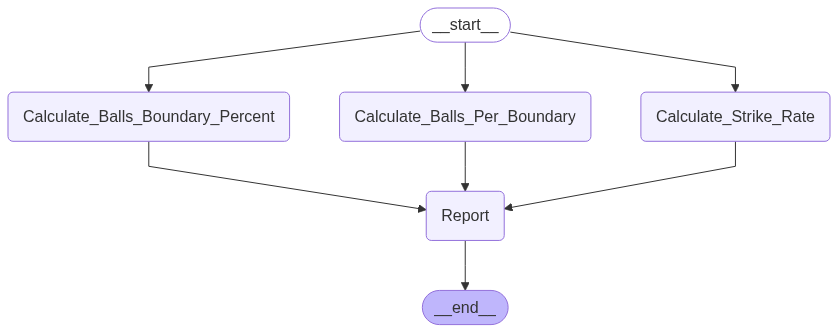

In [39]:
from IPython.display import display, Markdown, Image
Image(workflow.get_graph().draw_mermaid_png())
# display(Markdown("### BMI Calculator Workflow"))

In [ ]:
# Execute the workflow
intial_state: BatsmanPerformanceflowState = {
    "runs": 100,
    "sixs": 4,
    "fours": 6,
    "balls": 50,
    
    "strike_rate": 0.0,
    "balls_per_boundary_percent": 0.0,
    "balls_boundary_percent": 0.0,

    "report": ""
}
result_state = workflow.invoke(intial_state)


In [41]:
# Print the final report
print("Final Batsman Performance Report:")
print(result_state.get('report', 'No report generated.'))

Final Batsman Performance Report:
Batsman Performance Report:
Strike Rate: 200.00
Balls per Boundary Percentage: 5.00
Boundary Percentage: 48.00%

